Load saved data

In [2]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils

In [12]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from game2048.NNagent import NNAgent
from game2048.game import Game
tf.keras.backend.clear_session()
game = Game(4, random=False)
train=NNAgent(game,training=True,stateful=False)


model=train.model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat_input (InputLayer)          [(None, None, 4, 4,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 4, 4, 2 16640       cat_input[0][0]                  
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 4, 4, 2 262400      time_distributed[0][0]           
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, None, 4, 4, 2 262400      time_distributed_1[0][0]         
______________________________________________________________________________________________

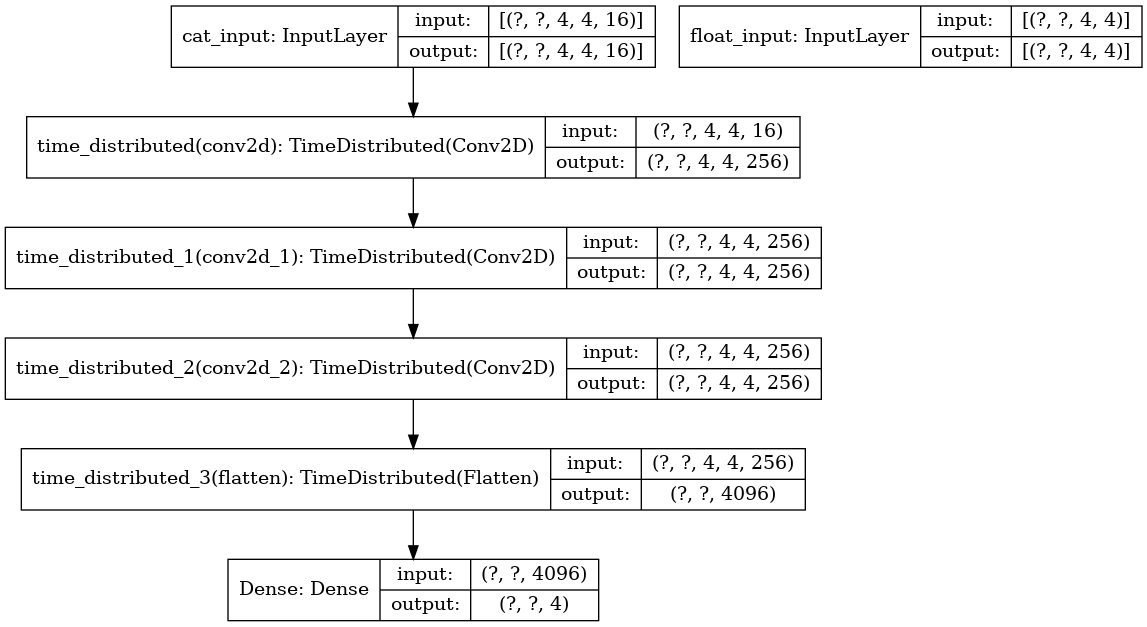

In [13]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
from IPython.display import Image
Image("model.png")

In [49]:
batches=np.load("currentfileindex.npy")
filenames=np.load("filenamelist.npy")
for batchnum in range(0,batches):
    X=np.load(filenames[batchnum][0])
    X_cat=np_utils.to_categorical(X,num_classes=16)
    Y=np.load(filenames[batchnum][1])
    Y=np_utils.to_categorical(Y,num_classes=4)
    batch_size=28
#     Mask=np.load(filenames[batchnum][2])
    
    #Y=np_utils.to_categorical(Y,num_classes=4)
#     from sklearn.model_selection import train_test_split
#     X_train, X_test,X_cat_train,X_cat_test,Y_train, Y_test = train_test_split(
#         X,X_cat,Y, test_size=0.1, random_state=42)
    model.fit([X,X_cat],Y,
             batch_size=batch_size,
              epochs=1,
              verbose=1)

Train on 55 samples
55/55 [==============================] - 1s 20ms/sample - loss: 1.1871 - CategoricalAccuracy: 0.3936
Train on 55 samples
55/55 [==============================] - 1s 18ms/sample - loss: 1.1838 - CategoricalAccuracy: 0.3934
Train on 55 samples
55/55 [==============================] - 1s 18ms/sample - loss: 1.1764 - CategoricalAccuracy: 0.3991
Train on 55 samples
55/55 [==============================] - 1s 18ms/sample - loss: 1.1850 - CategoricalAccuracy: 0.3908
Train on 55 samples
55/55 [==============================] - 1s 19ms/sample - loss: 1.1717 - CategoricalAccuracy: 0.4052
Train on 55 samples
55/55 [==============================] - 1s 19ms/sample - loss: 1.1510 - CategoricalAccuracy: 0.4154


In [47]:
X[4][999]
# np.argmax(X[4])

array([[ 8589934592, 17179869184,           0,  8589934592],
       [12884901888,  8589934592,           0,           0],
       [47244640256, 38654705664, 21474836480,  4294967296],
       [34359738368, 30064771072, 17179869184, 12884901888]])

In [7]:
model.save_weights('2048_5_31')

In [3]:
model.load_weights('2048_5_31')

In [6]:
model.evaluate([X_test,X_cat_test],Y_test,verbose=1)

1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0607 - CategoricalAccuracy: 0.4794


[1.060700180053711, 0.479405]

In [5]:
model.evaluate([X_test[:,300:399],X_cat_test[:,300:399]],Y_test[:,300:399],verbose=1)

1000/1000 [==============================] - 1s 907us/sample - loss: 1.1545 - CategoricalAccuracy: 0.4037


[1.1544540729522705, 0.40366668]

In [8]:
model.evaluate([X_test[:,0:50],X_cat_test[:,0:50]],Y_test[:,0:50],verbose=1)

1000/1000 [==============================] - 1s 918us/sample - loss: 1.1096 - CategoricalAccuracy: 0.4678


[1.1096490697860717, 0.46782]

In [9]:
from game2048.NNagent import NNAgent
from game2048.game import Game
import keras
import numpy as np
game = Game(4, random=False)
agent = NNAgent(game,modelname='2048_5_31',stateful=True)
model=agent.model
formatted=np.empty((1,1,4,4),dtype=float)
formatted[0,0]=[[0,1,2,3],
 [4,5,6,7],
 [8,9,10,11],
 [12,13,14,15]]
cat_formatted=keras.utils.to_categorical(formatted,num_classes=16)
formatted[0,0]=formatted[0,0]/np.max(formatted[0,0])
print(formatted[0,0])
Y=model.predict([formatted,cat_formatted],batch_size=1)
print (Y)
Y=model.predict([formatted,cat_formatted],batch_size=1)
print (Y)

[[0.         0.06666667 0.13333333 0.2       ]
 [0.26666667 0.33333333 0.4        0.46666667]
 [0.53333333 0.6        0.66666667 0.73333333]
 [0.8        0.86666667 0.93333333 1.        ]]
[[[0.16071297 0.431836   0.21081838 0.19663261]]]
[[[0.16071297 0.431836   0.21081838 0.19663261]]]


In [10]:
from game2048.NNagent import NNAgent
from game2048.game import Game
from game2048.displays import Display, IPythonDisplay
from game2048.agents import ExpectiMaxAgent
import numpy as np
display1 = Display()
display2 = IPythonDisplay()

test=1

accuracy=np.zeros((test,),dtype=float)
score=np.zeros((test,),dtype=int)
for i in range(test):
    game = Game(4, random=False)
    agent = NNAgent(game, display=display1,modelname='2048_5_31',stateful=True,debug=True)
    if test>1:
        accuracy[i]=agent.play(verbose=False)
    else:
        accuracy[i]=agent.play(verbose=True)
    score[i]=agent.game.score
    print(score[i],accuracy[i])
np.mean(score)
print(score)
#print (accuracy)

Iter: 1
======Direction: left======
======CorrectDirection: right======
State:	       4       0       0       0
	       0       0       0       0
	       2       0       0       0
	       2       0       0       0
Score: 4
Iter: 2
======Direction: left======
======CorrectDirection: right======
State:	       4       0       0       2
	       0       0       0       0
	       2       0       0       0
	       2       0       0       0
Score: 4
Iter: 3
======Direction: left======
======CorrectDirection: right======
State:	       4       2       0       0
	       0       0       0       0
	       2       0       0       2
	       2       0       0       0
Score: 4
Iter: 4
======Direction: left======
======CorrectDirection: right======
State:	       4       2       0       0
	       0       0       0       0
	       4       0       4       0
	       2       0       0       0
Score: 4
Iter: 5
======Direction: left======
======CorrectDirection: down======
State:	       4       2       0      

In [11]:

np.mean(score)

TypeError: must be real number, not list